In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv('wine_data.csv')
df.head()

,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [16]:
df = pd.read_csv('wine_data.csv',header=None , usecols = [0,1,2])
df.columns=['class_label','Alcohol','Malic acid']

In [17]:
df

,class_label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<AxesSubplot:xlabel='class_label', ylabel='Density'>

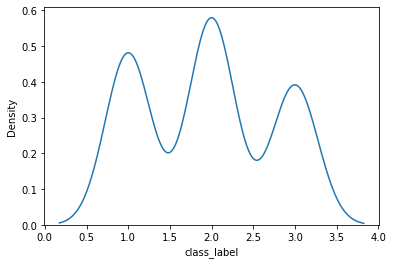

In [18]:
sns.kdeplot(df['class_label'])

<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

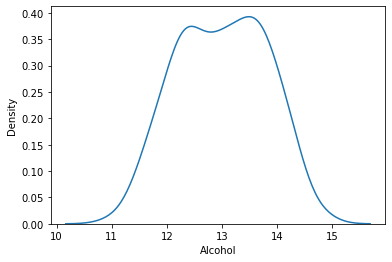

In [19]:
sns.kdeplot(df['Alcohol'])

In [21]:
df.head()

,class_label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

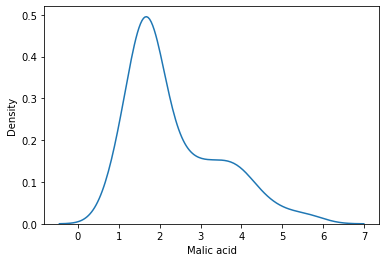

In [22]:
sns.kdeplot(df['Malic acid'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

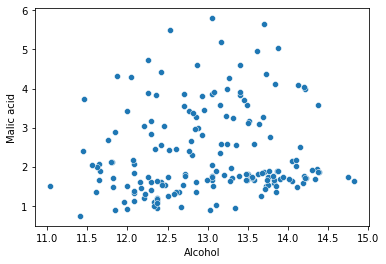

In [23]:
sns.scatterplot(df['Alcohol'],df['Malic acid'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

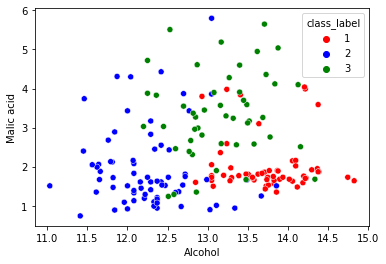

In [27]:

color_dict = {1:"red", 3:'green', 2:'blue'}
sns.scatterplot(df['Alcohol'],df['Malic acid'] ,hue = df['class_label'] ,palette=color_dict)

In [28]:
df.head()

,class_label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(df.drop('class_label',axis=1),
                                                  df['class_label'],
                                                  test_size   = 0.3,
                                                  random_state = 0)
                                                  
                                                 


X_train.shape,X_test.shape

((124, 2), (54, 2))

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [53]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [54]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


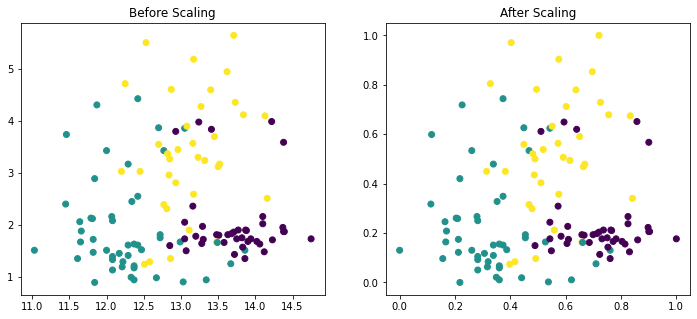

In [55]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

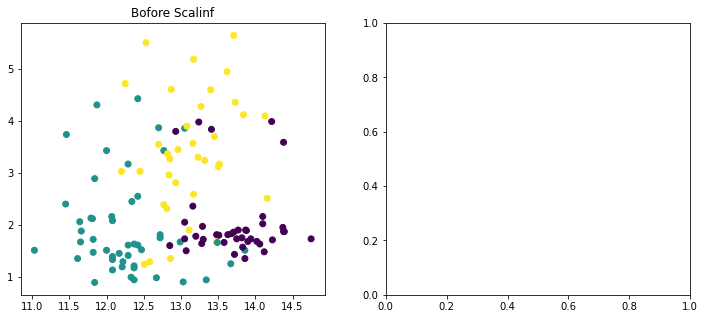

In [59]:
fig,(ax1,ax2 ) =plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Alcohol'],X_train["Malic acid"],c=y_train)
ax1.set_title("Bofore Scalinf")

ax2.subplots(df['Alcohol'],df['Malic acid'],c=y_train)
ax2.set_title("After Scalinf")
plt.show()